Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,735,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,750,051 (18.12 MB)

 Trainable params: 4,750,049 (18.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

File size:  17364
File saved: C:/Users/lms/Documents/Cmfc_cnn_python/SAVE/cast.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
true send success
true


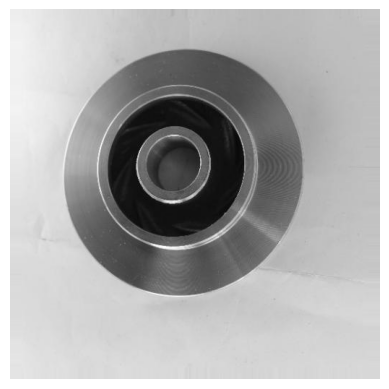

ConnectionResetError: [WinError 10054] 현재 연결은 원격 호스트에 의해 강제로 끊겼습니다

In [5]:
import socket
import os
import numpy as np
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def ReceiveFile(server_address, server_port, n_imagePath):
    #소켓생성 후 연결요청하기
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect((server_address, server_port))
    #파일 크기를 받음
    file_size_bytes = client_socket.recv(1024)
    file_size = int.from_bytes(file_size_bytes, byteorder='little')
    print("File size: ", file_size)
    #파일 크기만큼의 내용을 받음
    received_data = b""
    data = client_socket.recv(file_size)
    received_data += data

    #수신받은 파일 파일 경로에 
    with open(n_imagePath, 'wb') as f:
        f.write(received_data)
    print('File saved:', n_imagePath)

    #경로에서 이미지들고오기
    test_img = image.load_img(n_imagePath, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')
    x = image.img_to_array(test_img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    #모델로 이미지 검사하기
    classes = model.predict(images, batch_size=10)
    #검사 결과에 따라 서버에 송신하기
    if classes[0]==0:
        true = "t"
        if client_socket.send(true.encode('utf-32')):
            print("true send success")
        else:
            print("true send error")
        print("true")
    else:
        false = "f"
        if client_socket.send(false.encode('utf-32')):
            print("false send success")
        else:
            print("false send error")
        print("false")
    #소켓 닫기    
    client_socket.close()
    
def Display(n_imagePath):
    #들고온 이미지 확인용 출력
    n_img = mpimg.imread(n_imagePath)
    plt.imshow(n_img)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    n_ip = '10.10.20.99'
    n_port = 11999
    n_imagePath = 'C:/Users/lms/Documents/Cmfc_cnn_python/SAVE/cast.jpeg'

    #딥러닝 모델 호출
    model = load_model('C:/Users/lms/Documents/Visual Studio 2022/Case_cnn.h5')
    model.summary()

    while True:
        ReceiveFile(n_ip, n_port, n_imagePath)
        Display(n_imagePath)
    